# Understanding topics

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../raw_data/text_and_topics.csv', keep_default_na=False)

In [3]:
df

combined_preprocessed  answered_percent  \
0      would love think kind intellectual either dumb...             100.0   
1      chef mean workaholic love cook regardless whet...              60.0   
2      im ashamed much write public text online date ...              90.0   
3      work library go school read thing write old de...              70.0   
4      hey hows go currently vague profile know come ...              50.0   
...                                                  ...               ...   
59941  vibrant expressive care optimist love people t...             100.0   
59942  im nick never know write im sure hand im south...             100.0   
59943  hello enjoy travel watch movie hang friend rul...             100.0   
59944  world ball integrity one take either away momm...             100.0   
59945  odd little enemy status someone make seem inte...             100.0   

       text_length  topic_0_from_five  topic_1_from_five  topic_2_from_five  \
0             1565           0.905500           0.023574           0.023639   
1              815           0.027683           0.339134           0.027590   
2             3728           0.914891           0.021284           0.021307   
3              330           0.045781           0.045620           0.817402   
4              496           0.031946           0.031976           0.872147   
...            ...                ...                ...                ...   
59941         1040           0.028120           0.887424           0.028228   
59942         1634           0.900146           0.024829           0.025074   
59943         1189           0.024132           0.024193           0.024150   
59944         1122           0.902030           0.024473           0.024496   
59945         2107           0.911524           0.022130           0.022071   

       topic_3_from_five  topic_4_from_five  topic_0_from_two  \
0               0.023778           0.023509          0.271588   
1               0.578125           0.027468          0.446532   
2               0.021207           0.021311          0.280111   
3               0.045673           0.045524          0.330528   
4               0.032119           0.031812          0.450953   
...                  ...                ...               ...   
59941           0.028106           0.028123          0.571123   
59942           0.024849           0.025101          0.218072   
59943           0.024269           0.903256          0.705119   
59944           0.024619           0.024383          0.307921   
59945           0.022207           0.022068          0.228716   

       topic_1_from_two  
0              0.728412  
1              0.553468  
2              0.719889  
3              0.669472  
4              0.549047  
...                 ...  
59941          0.428877  
59942          0.781928  
59943          0.294881  
59944          0.692079  
59945          0.771284  

[59946 rows x 10 columns]

In [9]:
document_topic_matrix = df.iloc[:, 3:8]

(59946, 5)

## Topics distribution

In [10]:
num_topics = document_topic_matrix.shape[1]  # Number of topics

In [14]:
# Compute the topic distribution (sum of topic probabilities across all documents)
topic_distribution = np.sum(document_topic_matrix, axis=0)
topic_distribution

topic_0_from_five    17939.156010
topic_1_from_five    10999.896109
topic_2_from_five    10810.528728
topic_3_from_five    10137.160498
topic_4_from_five    10059.258654
dtype: float64

In [15]:
# Normalize to get proportions
topic_proportions = topic_distribution / np.sum(topic_distribution)
topic_proportions

topic_0_from_five    0.299255
topic_1_from_five    0.183497
topic_2_from_five    0.180338
topic_3_from_five    0.169105
topic_4_from_five    0.167805
dtype: float64

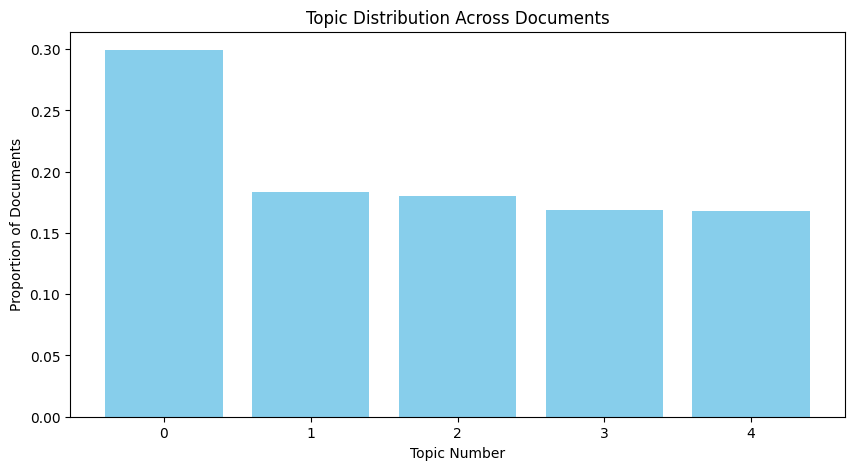

In [17]:
# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(range(num_topics), topic_proportions, color="skyblue")
plt.xlabel("Topic Number")
plt.ylabel("Proportion of Documents")
plt.title("Topic Distribution Across Documents")
plt.xticks(range(num_topics))  # Ensure all topics are labeled
plt.show()

## Wordcloud

In [23]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)
